In [3]:
import csv 
from shapely.geometry import Point, mapping
from fiona import collection
import geopandas as gp

In [49]:
with open("C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv", 'r', encoding='ISO-8859-1') as  f:
    reader = csv.DictReader(f)
    for row in reader:
        print(row)


OrderedDict([('date', '27-Jul-18'), ('lat', '29.757614'), ('lon', '-95.37268'), ('geoid', '4.82E+14'), ('block', 'Block 2008'), ('blockgroup', '2'), ('address', '333 clay st'), ('city', 'houston'), ('zipcode', '77002'), ('state', 'tx'), ('walkability', '91'), ('walkabilitydescription', "Walker's Paradise"), ('', 'https://42floors.com/us/tx/houston/333-clay-st'), ('bikability', '78'), ('bikabilitydescription', 'Very Bikeable'), ('squarefoot', '10600sqft'), ('askingrent', 'NotProvided'), ('type', ' Office '), ('details', ',Floors,50,Total,Size,1,195,000,sqft,Lot,Size,3,acres,Parking,Ratio,1,1000,Elevators,2,Year,Constructed,1980,Building,Class,A,LEED,Certification,Gold,Construction,Type,Glass,Close,To,The,Downtown,Club,at,the,Met,DoubleTree,Hotel,Hyatt,Regency,Hotel,Gym,Onsite,Parking,Parking,Garage,Lobby,Attendant,On,Site,Security,'), ('floors', '50'), ('totalsize', '1195000sqft'), ('lotsize', '3acres'), ('parkingratio', '1 1000'), ('yearconstructed', '1980'), ('propertyclass', 'A'), ('

OrderedDict([('date', '16-Apr-18'), ('lat', '29.55617'), ('lon', '-95.31032'), ('geoid', '4.80E+14'), ('block', 'Block 2000'), ('blockgroup', '2'), ('address', '2821 wagon trail rd'), ('city', 'pearland'), ('zipcode', '77584'), ('state', 'tx'), ('walkability', '35'), ('walkabilitydescription', 'Car-Dependent'), ('', 'https://42floors.com/us/tx/pearland/2821-wagon-trail-rd'), ('bikability', 'nan'), ('bikabilitydescription', 'nan'), ('squarefoot', '2000sqft'), ('askingrent', '295000'), ('type', ' Industrial '), ('details', ',Total,Size,2,000,sqft,Lot,Size,1,acres,Year,Constructed,1981,'), ('floors', 'nan'), ('totalsize', '2000sqft'), ('lotsize', '1acres'), ('parkingratio', 'nan'), ('yearconstructed', '1981'), ('propertyclass', 'nan'), ('zoning', 'nan'), ('medianincome', '88479'), ('incomebelowpovert', '0.121'), ('incomeless24', '0.0813'), ('incomebetween25and50', '0.24633'), ('income50to100', '0.3258'), ('income100to200', '0.25428'), ('incomegreater200', '0.0923'), ('highschoolgraduation


OrderedDict([('date', '19-Jul-18'), ('lat', '29.376503'), ('lon', '-95.10028'), ('geoid', '4.82E+14'), ('block', 'Block 2000'), ('blockgroup', '2'), ('address', '12981 hwy 6'), ('city', 'santa-fe'), ('zipcode', '77510'), ('state', 'tx'), ('walkability', '31'), ('walkabilitydescription', 'Car-Dependent'), ('', 'https://42floors.com/us/tx/santa-fe/12981-hwy-6'), ('bikability', 'nan'), ('bikabilitydescription', 'nan'), ('squarefoot', '700sqft'), ('askingrent', '199000'), ('type', ' Industrial '), ('details', ',Floors,1,Construction,Type,Concrete,Wood,Close,Highway,s,Route,6,Onsite,Parking,'), ('floors', '1'), ('totalsize', 'nan'), ('lotsize', 'nan'), ('parkingratio', 'nan'), ('yearconstructed', 'nan'), ('propertyclass', 'nan'), ('zoning', 'nan'), ('medianincome', '56442'), ('incomebelowpovert', '0.13'), ('incomeless24', '0.17976'), ('incomebetween25and50', '0.19053'), ('income50to100', '0.38321'), ('income100to200', '0.22928'), ('incomegreater200', '0.0172'), ('highschoolgraduation', '0.

In [79]:
#write latitude longitude in csv into shapefile, with properties
schema = { 'geometry':'Point',
           'properties':{ 'address': 'str',
                          'city': 'str',
                          'state': 'str',
                          'zipcode': 'str',
                          'walkability': 'str',
                          'walkabilitydescription': 'str',
                          'bikability': 'str',
                          'bikabilitydescription': 'str',
                          },
           
           }
           
with collection("Houston.shp", "w", "ESRI Shapefile", schema) as output:
    with open('C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv', 'r', encoding='ISO-8859-1') as f:
        reader = csv.DictReader(f)
        for row in reader:
            point = Point(float(row['lon']), float(row['lat']))
            output.write({
                'properties': {
                    'address':row['address'],
                    'city':row['city'],
                    'state':row['state'],
                    'zipcode':row['zipcode'],
                    'walkability':row['walkability'],
                    'walkabilitydescription':row['walkabilitydescription'],
                    'bikability':row['bikability'],
                    'bikabilitydescription':row['bikabilitydescription'],
                }, #add all the properties into the shapefile point!
                'geometry': mapping(point)
            })
            

In [85]:
import geopandas as gp

realestatelocations = gp.GeoDataFrame.from_file(
    'C:/Users/Joe/PycharmProjects/GIS/Houston.shp')

realestatelocations.head()


,address,city,state,zipcode,walkabilit,walkabil_1,bikability,bikabili_1,geometry
0,333 clay st,houston,tx,77002,91,Walker's Paradise,78,Very Bikeable,POINT (-95.37268 29.757614)
1,10700 richmond ave,houston,tx,77042,54,Somewhat Walkable,46,Somewhat Bikeable,POINT (-95.5633 29.727798)
2,500 dallas st,houston,tx,77002,81,Very Walkable,80,Very Bikeable,POINT (-95.37035 29.757986)
3,1000 louisiana st,houston,tx,77002,84,Very Walkable,81,Very Bikeable,POINT (-95.36756 29.758465)
4,10777 northwest fwy,houston,tx,77074,38,Car-Dependent,39,Somewhat Bikeable,POINT (-95.55343000000001 29.663622)


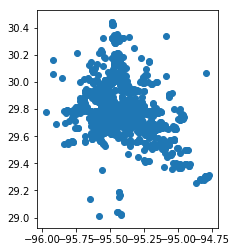

In [87]:
realestatelocations.plot()